# Logistic Regression Classifier

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 435ms/step - loss: 2.8734 - accuracy: 0.5714
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 2.8293 - accuracy: 0.4286
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 2.7854 - accuracy: 0.4286
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 2.7416 - accuracy: 0.4286
Epoch 5/500
1/1 [============

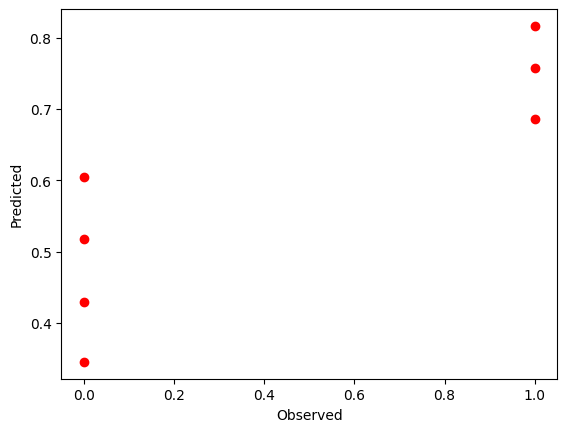

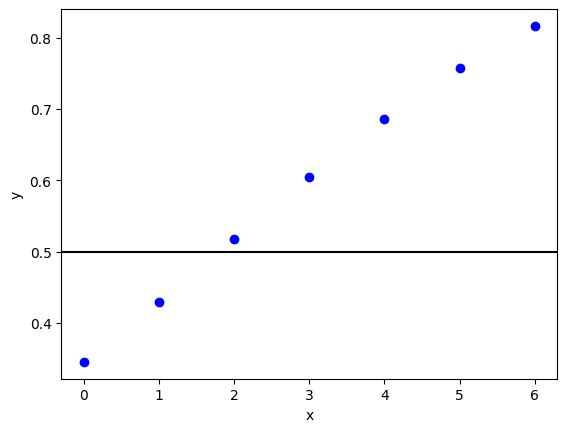

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

x_data = [[0],
          [1],
          [2],
          [3],
          [4],
          [5],
          [6]]

y_data = [[0],
          [0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# one-hot encoding

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))
# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

'''
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
tf.model.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.SGD(lr=0.1),
                 metrics=['accuracy'])
tf.model.summary()


# for tensorboard
logdir="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


#history = tf.model.fit(x_data, y_data, epochs=500)

# add callback param to fit()
history = tf.model.fit(x_data, y_data, epochs=500, callbacks=[tensorboard_callback])

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])

# python -m tensorboard.main --logdir="logs/20231012-164400" --port=6006






# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

y_predict = tf.model.predict(x_data)

plt.figure(1)
plt.plot(y_data, y_predict, 'ro')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

plt.figure(2)
plt.plot(x_data,y_predict,'bo')
plt.axhline(0.5, color='k')
plt.xlabel("x")
plt.ylabel('y')
plt.show()



# Lab Logistic Regression Classifier - multi dimension

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 20701 (80.86 KB)
Trainable params: 20701 (80.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 389ms/step - loss: 0.6659 - accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 

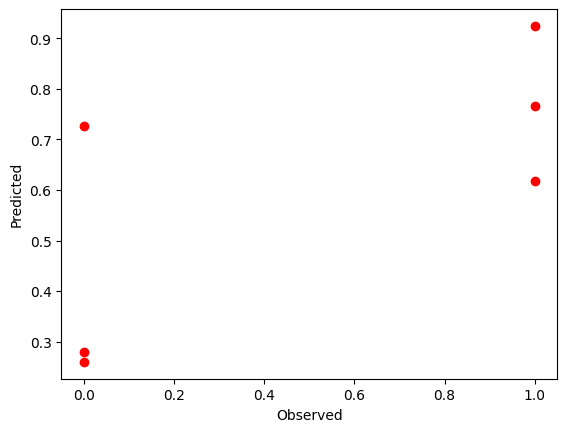

In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# one-hot encoding

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=100, input_dim=2))
tf.model.add(tf.keras.layers.Dense(units=200))
tf.model.add(tf.keras.layers.Dense(units=1))

# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

'''
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=100)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

y_predict = tf.model.predict(x_data)

plt.figure(1)
plt.plot(y_data, y_predict, 'ro')

plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()



# Logistic Regression Classifier - diabetes  


(759, 9) (759, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                100       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4440
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5955
Epoch 3/500
24/24 [==============================] - 0s 1ms/step

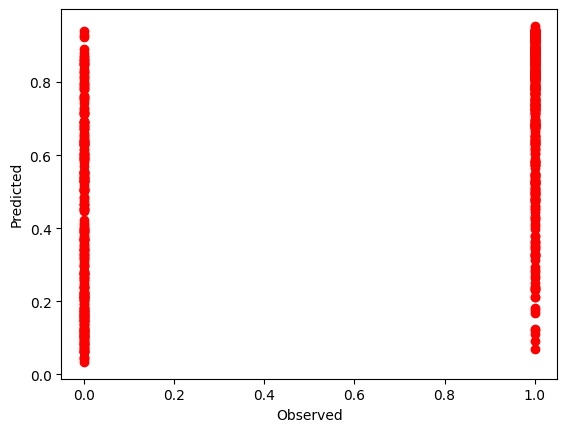

In [3]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

tf.model = tf.keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=x_data.shape[1], activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=5, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=1e-02),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=500)

# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

# predict a single data point
y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333,0]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = tf.model.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

y_predict = tf.model.predict(x_data)

plt.figure(1)
plt.plot(y_data, y_predict, 'ro')

plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()